<a href="https://colab.research.google.com/github/sneha2830/CODSOFT/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas.io.pickle import pc
%matplotlib inline

In [98]:
##importing dataset
train = pd.read_csv('tested.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
train.shape

(418, 12)

In [30]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [31]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [33]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


<Axes: xlabel='Survived', ylabel='count'>

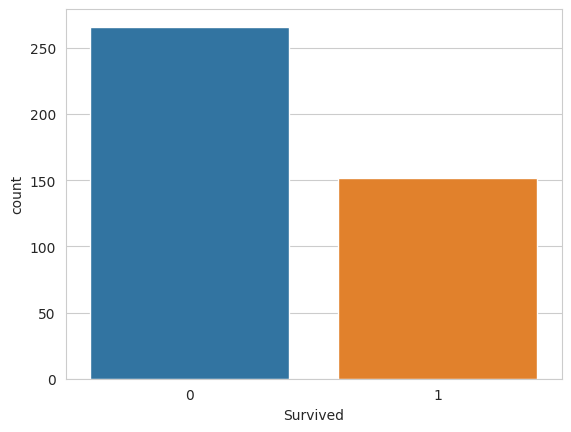

In [47]:
sns.countplot(x='Survived',data=train)



<Axes: xlabel='Survived', ylabel='count'>

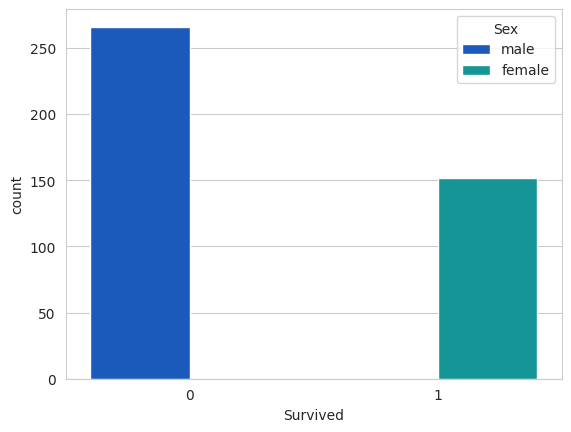

In [49]:
sns.countplot(x='Survived', hue= 'Sex', data=train , palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

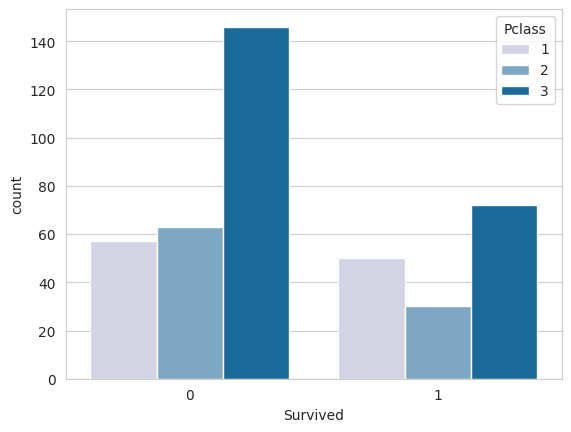

In [50]:
sns.countplot(x='Survived', hue= 'Pclass', data=train , palette='PuBu')

<Axes: ylabel='Frequency'>

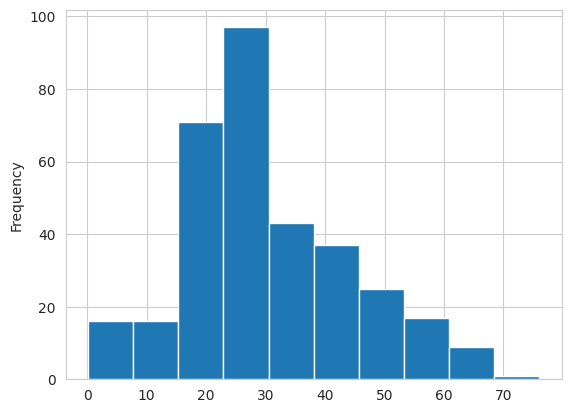

In [51]:
train['Age'].plot.hist()

<Axes: ylabel='Frequency'>

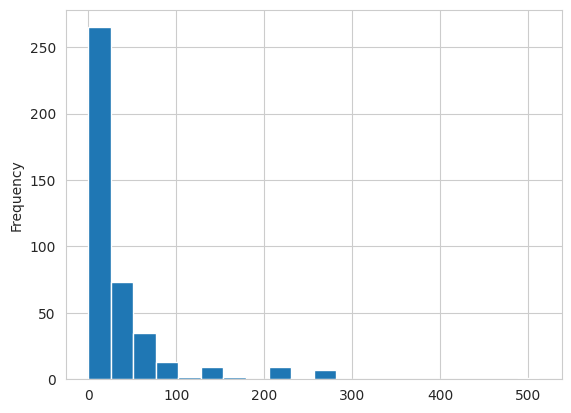

In [54]:
train['Fare'].plot.hist(bins=20)

<Axes: xlabel='SibSp', ylabel='count'>

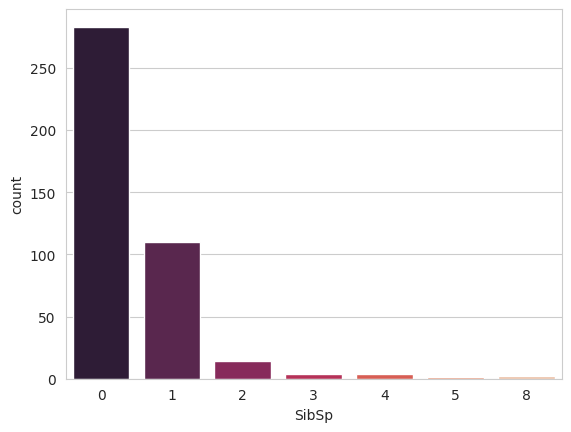

In [55]:
sns.countplot(x='SibSp', data=train, palette='rocket')

In [ ]:
#we notice that most of the passengers do not have their siblings abroad.

<Axes: ylabel='Frequency'>

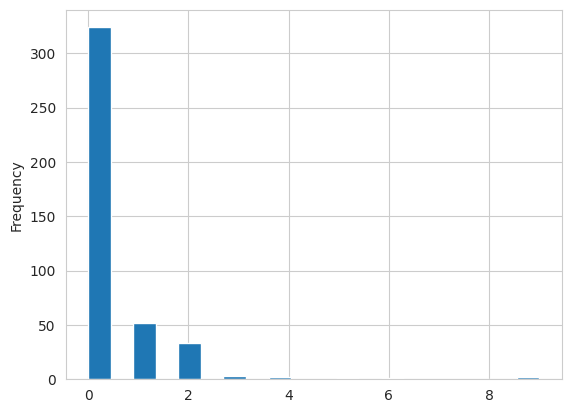

In [57]:
train['Parch'].plot.hist(bins=20)

<Axes: xlabel='Parch', ylabel='count'>

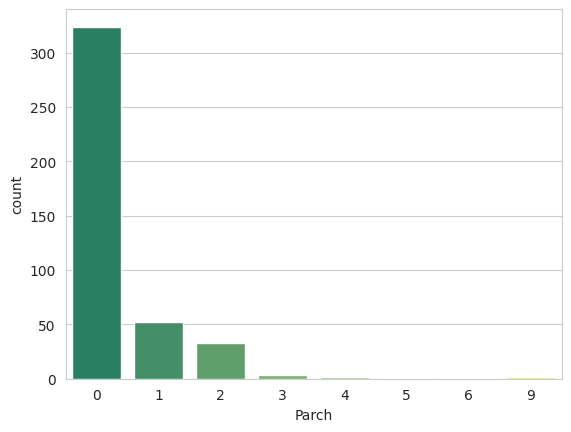

In [58]:
sns.countplot(x='Parch', data=train, palette='summer')

**Data wrangling**

In [ ]:
##data wrangling means cleaning the data , removing the null values

In [60]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
##age and cabin has most null values, and embarked too has null values

<Axes: >

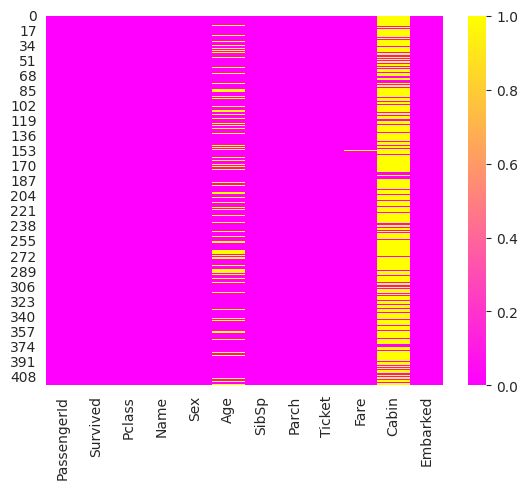

In [61]:
sns.heatmap(train.isnull(), cmap='spring')

In [ ]:
##here yellow color is showing the null values, highest in cabin followed by age

<Axes: xlabel='Pclass', ylabel='Age'>

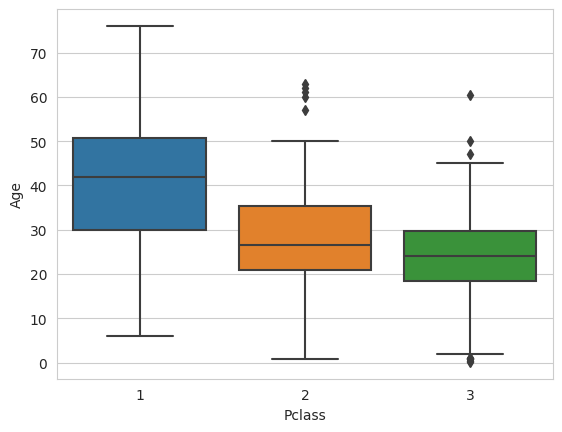

In [62]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [ ]:
##we can observe that older age group are travelling more in class 1 and 2
#compared to class 3

In [ ]:
##the hue parameter determines which column in the data frame should be used for color encoding
##we will drop a few columns now

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
train.drop('Cabin', axis=1, inplace=True)

In [66]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [67]:
train.dropna(inplace=True)

<Axes: >

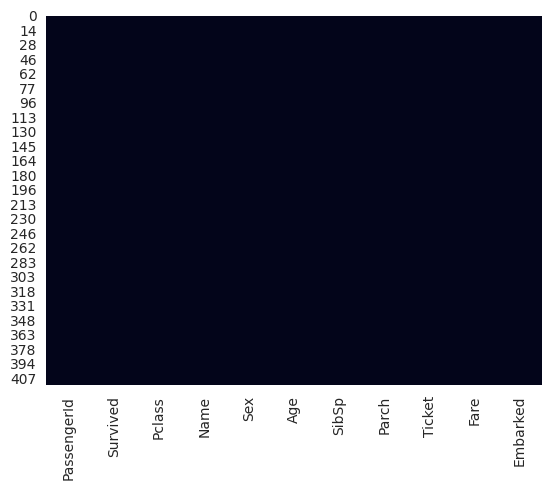

In [69]:
sns.heatmap(train.isnull(), cbar=False)

In [ ]:
##this shows that we don't have any null values we can also check it

In [70]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [71]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [ ]:
##we will convert few columns into categorial data to apply logistic regression

In [72]:
pd.get_dummies(train['Sex']).head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [74]:
sex=pd.get_dummies(train['Sex'], drop_first=True)
sex.head(3)

,male
0,1
1,0
2,1


In [ ]:
##we have dropped the first column because only one column is sufficient to determine
##the gender of the passenger either will be  male(1) or not(0), that means a female

In [76]:
embark=pd.get_dummies(train['Embarked'])
embark.head(3)

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0


In [ ]:
##C stands for cherbourg, Q stands for queenstown, S stands for Southhampton
##we can drop any one of the column as we can infer from the two columns itself

In [78]:
embark=pd.get_dummies(train['Embarked'], drop_first=True)
embark.head(3)

,Q,S
0,1,0
1,0,1
2,1,0


In [ ]:
##if both values are 0 passenger is travelling in first class

In [91]:
Pcl=pd.get_dummies(train['Pclass'], drop_first=True)
Pcl.head(3)

,2,3
0,0,1
1,0,1
2,1,0


In [ ]:
##our data is now converted into categorial data

In [102]:
train=pd.concat([train, sex, embark, Pcl], axis=1)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0,1.0,0.0,0.0,1.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0,0.0,1.0,0.0,1.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0,1.0,0.0,1.0,0.0


In [ ]:
##deleting the unwanted columns

In [103]:
train.drop(['Name', 'PassengerId', 'Pclass', 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)
train.head(3)

,Survived,Age,SibSp,Parch,Fare,Cabin,male,Q,S,2,3
0,0,34.5,0,0,7.8292,NaN,1.0,1.0,0.0,0.0,1.0
1,1,47.0,1,0,7.0000,NaN,0.0,0.0,1.0,0.0,1.0
2,0,62.0,0,0,9.6875,NaN,1.0,1.0,0.0,1.0,0.0


# train data

In [104]:
x=train.drop('Survived', axis=1)
y=train['Survived']

In [105]:
from sklearn.model_selection import train_test_split


**logistic regression**

In [158]:
# Split the data into training and testing sets
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

